In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [39]:
import h5py

# Open the HDF5 file in read mode
h5_file = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# List of dataset names
dataset_names = ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

# Read each dataset and store them in variables
datasets = {}
for dataset_name in dataset_names:
    datasets[dataset_name] = h5_file[dataset_name][()]

# Close the HDF5 file
h5_file.close()

# Access the datasets using the variables
X_test = datasets['X_test']
X_train = datasets['X_train']
X_val = datasets['X_val']
y_test = datasets['y_test']
y_train = datasets['y_train']
y_val = datasets['y_val']


In [40]:
X_val.shape

(60000, 32, 32)

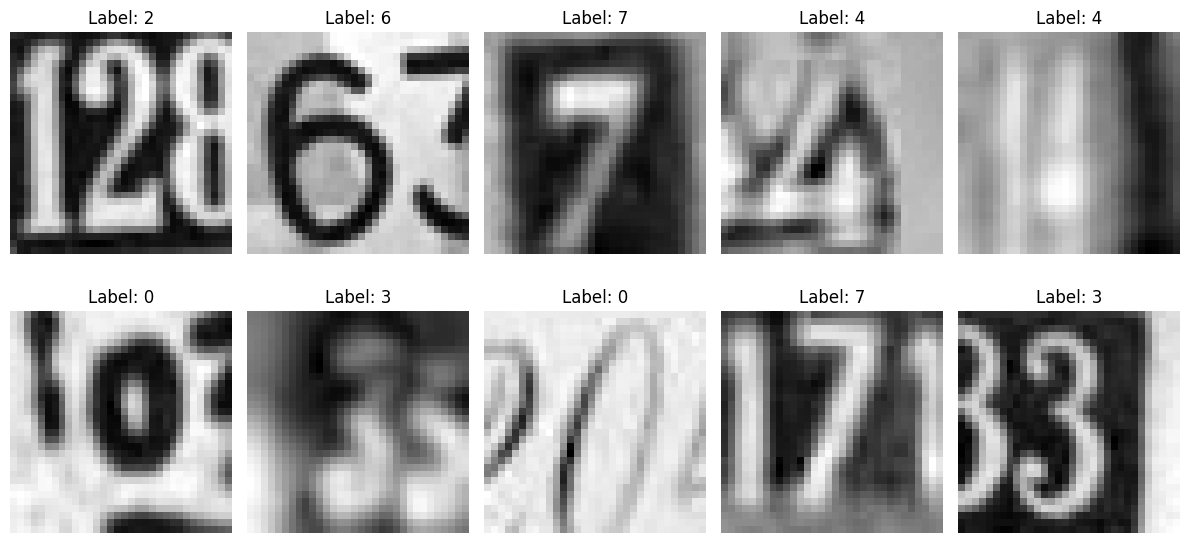

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your labels are stored in y_train
# Load labels corresponding to the first 10 images
labels = y_train[:10]

# Visualize the first 10 images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Assuming images are grayscale
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [41]:
num_images = X_val.shape[0]
image_shape = X_val.shape[1:]

print("Total number of images:", num_images)
print("Image dimensions:", image_shape)


Total number of images: 60000
Image dimensions: (32, 32)


In [44]:
X_train_reshaped = X_train.reshape(-1, 32, 32, 1)

X_test_reshaped = X_test.reshape(-1, 32, 32, 1)
X_val_reshaped = X_val.reshape(-1, 32, 32, 1)



In [52]:
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("X_val_reshaped shape:", X_val_reshaped.shape)


X_train_reshaped shape: (42000, 32, 32, 1)
X_test_reshaped shape: (18000, 32, 32, 1)
X_val_reshaped shape: (60000, 32, 32, 1)


In [46]:
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0
X_val_normalized = X_val_reshaped / 255.0


In [47]:
# Identifying number of unique classes in y test and y train

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

print("Total number of classes:", num_classes)



Total number of classes: 10


In [48]:

# Convert integer labels to one-hot encoded format
num_classes = 10  # Replace with the actual number of classes
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

In [49]:


# Load and preprocess your data
# X_train_reshaped, y_train_encoded, X_test_reshaped, y_test_encoded = ...

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a validation set
model.fit(X_train_normalized, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_val_normalized, y_val_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print(f'Loss on test set: {loss}')
print(f'Accuracy on test set: {accuracy}')


Epoch 1/10
657/657 [==============================] - 103s 153ms/step - loss: 1.1017 - accuracy: 0.6488 - val_loss: 0.5820 - val_accuracy: 0.8430
Epoch 2/10
657/657 [==============================] - 99s 151ms/step - loss: 0.5529 - accuracy: 0.8486 - val_loss: 0.5281 - val_accuracy: 0.8516
Epoch 3/10
657/657 [==============================] - 100s 152ms/step - loss: 0.4742 - accuracy: 0.8691 - val_loss: 0.4417 - val_accuracy: 0.8800
Epoch 4/10
657/657 [==============================] - 108s 165ms/step - loss: 0.4163 - accuracy: 0.8819 - val_loss: 0.4106 - val_accuracy: 0.8819
Epoch 5/10
657/657 [==============================] - 148s 225ms/step - loss: 0.3733 - accuracy: 0.8935 - val_loss: 0.3462 - val_accuracy: 0.9036
Epoch 6/10
657/657 [==============================] - 137s 209ms/step - loss: 0.3383 - accuracy: 0.9011 - val_loss: 0.3615 - val_accuracy: 0.8949
Epoch 7/10
657/657 [==============================] - 112s 170ms/step - loss: 0.3088 - accuracy: 0.9104 - val_loss: 0.3225 - 

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mtx)


563/563 [==============================] - 8s 13ms/step
Accuracy: 0.8960555555555556
Precision: 0.8964574671215205
Recall: 0.8960555555555556
F1-Score: 0.8959513894982148
Confusion Matrix:
[[1691   22   10    9   13    3   21   10   10   25]
 [  23 1619    5   23   69   11   13   42   15    8]
 [  10   14 1614   21   22    5    5   43   25   44]
 [   8   23   22 1435   16  110   22   23   42   18]
 [   8   22   10    8 1685    9   20   11   16   23]
 [   2   12    7   45    9 1613   35   10   19   16]
 [  26    9    7   10   28   75 1609    6   54    8]
 [   8   25   18   20   17    9    3 1687    7   14]
 [  23   27    4   29   20   20   65   12 1586   26]
 [  35   14   21   29   25   31   14   17   28 1590]]


Epoch 1/10
657/657 [==============================] - 94s 144ms/step - loss: 0.2201 - accuracy: 0.9356 - val_loss: 0.2660 - val_accuracy: 0.9255
Epoch 2/10
657/657 [==============================] - 88s 134ms/step - loss: 0.2009 - accuracy: 0.9406 - val_loss: 0.2508 - val_accuracy: 0.9304
Epoch 3/10
657/657 [==============================] - 93s 142ms/step - loss: 0.1835 - accuracy: 0.9465 - val_loss: 0.2219 - val_accuracy: 0.9410
Epoch 4/10
657/657 [==============================] - 104s 158ms/step - loss: 0.1652 - accuracy: 0.9505 - val_loss: 0.2179 - val_accuracy: 0.9432
Epoch 5/10
657/657 [==============================] - 105s 159ms/step - loss: 0.1526 - accuracy: 0.9548 - val_loss: 0.2312 - val_accuracy: 0.9381
Epoch 6/10
657/657 [==============================] - 79s 120ms/step - loss: 0.1389 - accuracy: 0.9578 - val_loss: 0.2160 - val_accuracy: 0.9437
Epoch 7/10
657/657 [==============================] - 78s 118ms/step - loss: 0.1258 - accuracy: 0.9626 - val_loss: 0.2098 - val_

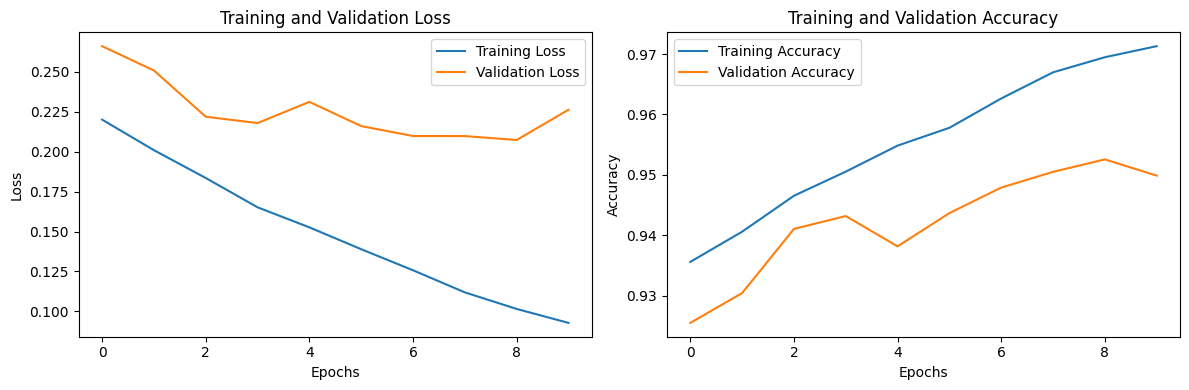

In [51]:

# Get training history from the model.fit() function
history = model.fit(X_train_normalized, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_val_normalized, y_val_encoded))

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
